<a href="https://colab.research.google.com/github/pramodpachpule/object_detection/blob/main/Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle competitions download -c cifar-10

100% 715M/715M [00:36<00:00, 23.6MB/s]
100% 715M/715M [00:36<00:00, 20.8MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.0 MB/s eta 0:00:00


In [8]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')
len(filenames)

50000

In [12]:
print(filenames[0:5])
print(filenames[-5:])

['30071.png', '45812.png', '7256.png', '18685.png', '16722.png']
['24510.png', '32089.png', '29315.png', '19995.png', '19959.png']


**Labels Processing**

In [13]:
labels_data = pd.read_csv('/content/trainLabels.csv')

In [14]:
labels_data.shape

(50000, 2)

In [15]:
labels_data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [16]:
labels_data['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [17]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_data['label']]
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


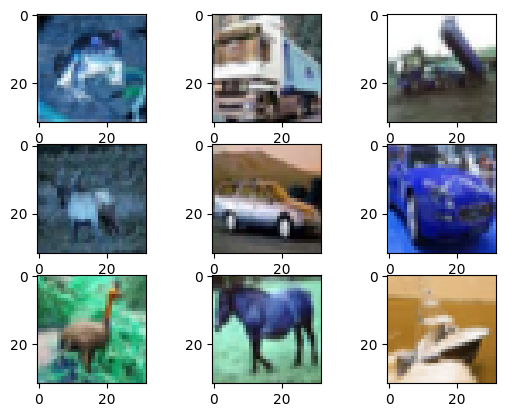

In [18]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
for i in range(9):
  plt.subplot(3,3,i + 1)
  img = cv2.imread('/content/train/'+ str(1+i)+ '.png')
  plt.imshow((img))

In [19]:
labels_data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [20]:
id_list = list(labels_data['id'])

In [21]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [22]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [23]:
# convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [24]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [27]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building the Neural Network**

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator

In [29]:
num_of_classes = 10
lr_rate = 0.01
batch_size = 35
epochs = 10

# setting up the layers of Neural Network
model = Sequential([
    Conv2D(128, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.4),
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_of_classes, activation='softmax')
])

In [30]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1125/1125 [==============================] - 20s 6ms/step - loss: 1.8209 - acc: 0.3182 - val_loss: 1.4537 - val_acc: 0.4675
Epoch 2/20
1125/1125 [==============================] - 7s 6ms/step - loss: 1.5295 - acc: 0.4434 - val_loss: 1.3032 - val_acc: 0.5175
Epoch 3/20
1125/1125 [==============================] - 6s 6ms/step - loss: 1.4168 - acc: 0.4901 - val_loss: 1.2496 - val_acc: 0.5573
Epoch 4/20
1125/1125 [==============================] - 6s 6ms/step - loss: 1.3244 - acc: 0.5259 - val_loss: 1.1346 - val_acc: 0.5962
Epoch 5/20
1125/1125 [==============================] - 6s 5ms/step - loss: 1.2549 - acc: 0.5561 - val_loss: 1.0928 - val_acc: 0.6072
Epoch 6/20
1125/1125 [==============================] - 6s 6ms/step - loss: 1.2038 - acc: 0.5750 - val_loss: 1.0438 - val_acc: 0.6283
Epoch 7/20
1125/1125 [==============================] - 6s 5ms/step - loss: 1.1574 - acc: 0.5919 - val_loss: 1.0244 - val_acc: 0.6355
Epoch 8/20
1125/1125 [==============================] - 7s 6m

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.8631 - acc: 0.7031
Test Accuracy = 0.7031000256538391


Text(0.5, 1.0, 'Accuracy Curves')

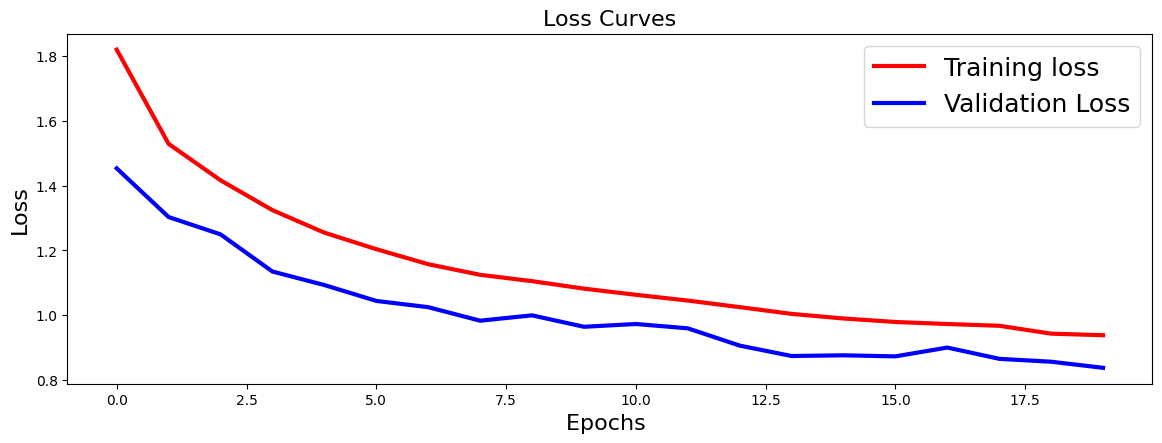

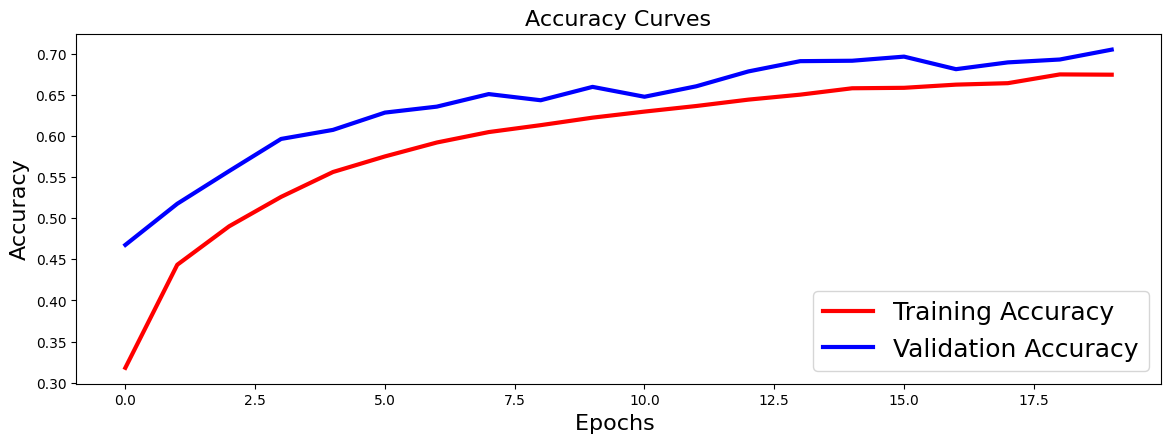

In [32]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

**ResNet50**

In [33]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [34]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [35]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [36]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])
datagen = ImageDataGenerator(zoom_range=0.2, # randomly zoom into images
                             rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=False)  # randomly flip images
history = model.fit_generator(datagen.flow(X_train_scaled, Y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_test_scaled, Y_test),
                              workers=4)

<ipython-input-36-bf99b5eabf4b>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train_scaled, Y_train, batch_size=batch_size),


Epoch 1/10
1143/1143 [==============================] - 589s 484ms/step - loss: 1.7702 - acc: 0.4126 - val_loss: 0.8825 - val_acc: 0.7289
Epoch 2/10
1143/1143 [==============================] - 550s 481ms/step - loss: 1.1165 - acc: 0.6501 - val_loss: 0.5162 - val_acc: 0.8569
Epoch 3/10
1143/1143 [==============================] - 550s 481ms/step - loss: 0.8456 - acc: 0.7612 - val_loss: 0.3945 - val_acc: 0.8954
Epoch 4/10
1143/1143 [==============================] - 550s 481ms/step - loss: 0.6937 - acc: 0.8155 - val_loss: 0.3022 - val_acc: 0.9221
Epoch 5/10
1143/1143 [==============================] - 550s 481ms/step - loss: 0.5942 - acc: 0.8494 - val_loss: 0.2788 - val_acc: 0.9241
Epoch 6/10
1143/1143 [==============================] - 544s 476ms/step - loss: 0.5220 - acc: 0.8730 - val_loss: 0.2346 - val_acc: 0.9355
Epoch 7/10
1143/1143 [==============================] - 544s 476ms/step - loss: 0.4583 - acc: 0.8898 - val_loss: 0.2118 - val_acc: 0.9413
Epoch 8/10
1143/1143 [============

In [37]:
# history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Text(0.5, 1.0, 'Accuracy Curves')

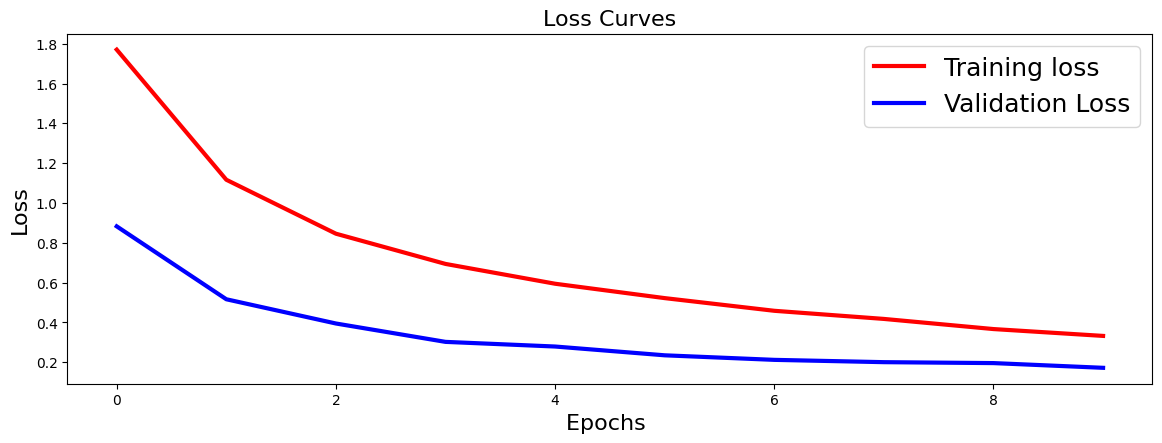

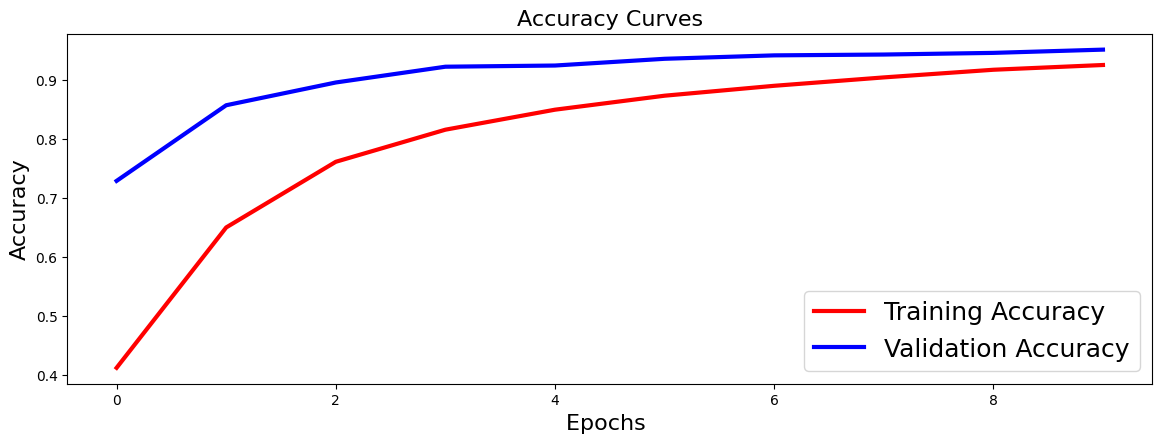

In [38]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 36s 115ms/step - loss: 0.1719 - acc: 0.9510
Test Accuracy = 0.9509999752044678
